<a href="https://colab.research.google.com/github/OmdenaAI/SudanChapter_AnalyzeHealthcareAccessibility/blob/main/04_Data_analysis/Healthcare_Systems/HC_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Dataset Analysis

Import packages

In [ ]:
# import packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load HC_sudan.csv dataset
hc_sudan = "/content/HC_sudan.csv"

pd.read_csv(hc_sudan) # Throws a Codec error while loading file. The file is not in utf-8 codec.

In [ ]:
# Resolve codec issue by detecting file codec and reverting to utf-8

import chardet

# Open the file in binary mode
with open(hc_sudan, 'rb') as file:
    raw_data = file.read()

# Detect encoding
result = chardet.detect(raw_data)
print(result)         # The file is an ISO standard "Latin-1" encoding

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [ ]:
# Changing the Latin-1 encoding to UTF-8 encoding

# Open the file with errors='replace'
with open(hc_sudan, 'r', encoding='utf-8', errors='replace') as file:
    data = file.read()

# Save the cleaned data to a temporary file
with open('cleaned_file.csv', 'w', encoding='utf-8') as cleaned_file:
    cleaned_file.write(data)

# Load the cleaned file with Pandas
df = pd.read_csv('cleaned_file.csv')
df.head(10)

,Name,X,Y,addr_city,addr_street,amenity,changeset_id,changeset_timestamp,changeset_user,changeset_version,completeness,dispensing,osm_id,osm_type,uuid,Unnamed: 15
0,0,32.536015,15.632537,0,0,pharmacy,59859075,2018-06-14 20:48:56,allasafieldin,1,12,yes,5691668660,node,62a1f69b5e464b3a831724e7e633b9f7,NaN
1,0,0.000000,0.000000,0,0,hospital,82920351,2020-04-01 11:29:56,AARod,1,9,0,786505555,way,6bed7ba76fdc43f2a959908df295b6c8,NaN
2,0,32.533961,15.528663,0,0,pharmacy,30685807,2015-05-01 09:28:35,AhmedSDN,1,6,0,3490668393,node,516a03ec3daf43e68f01ca8c8564d169,NaN
3,Wad Musa Pharmacy,32.441141,15.683439,0,0,pharmacy,89779217,2020-08-22 12:03:41,ImadJ,1,15,yes,7834704444,node,77c5b490089945198e0cfa5b45bd5c6b,NaN
4,0,0.000000,0.000000,0,0,hospital,61428897,2018-08-07 09:45:25,ali-hasboo,1,12,0,614753021,way,5888223145234835bd0211b5475c0469,NaN
5,Ombada Model Hospital,32.419073,15.663948,0,0,hospital,91869265,2020-10-02 13:55:09,Shandiwad Mamo,1,9,0,7966428285,node,76583bb93bdb4da2ba643fe777238151,NaN
6,Tropical Medicine Hospital,32.493623,15.640279,0,0,hospital,110999264,2021-09-10 01:11:47,sudanix,2,12,0,8006766734,node,4402d3f0c21746ccae6465e2aed37f24,NaN
7,0,0.000000,0.000000,0,0,hospital,82917752,2020-04-01 10:35:20,AARod,1,9,0,786492638,way,b2c9fbe9fd004fa09485dc701f754467,NaN
8,Al-Hagan Pharmacy,32.444681,15.612955,0,0,pharmacy,74564567,2019-09-17 08:26:04,wadsaeed,1,9,0,6801517152,node,e06fd58c4a20407a9fc8725426a52dfe,NaN
9,0,26.130148,11.462685,0,0,clinic,84185564,2020-04-27 09:04:02,Classic&ordinary,1,6,0,7452472488,node,afb4e326f311451b86a762a4ee16658b,NaN


### Understanding the data
- shape
- describe
- dtypes
- unique values
- missing values
- duplicate values

In [ ]:
df.shape

(1180, 16)

In [ ]:
df.describe()

,X,Y,changeset_id,changeset_version,completeness,osm_id,Unnamed: 15
count,1180.000000,1180.000000,1.180000e+03,1180.000000,1180.000000,1.180000e+03,0.0
mean,31.775855,15.186397,9.132590e+06,0.180508,1.436441,6.434055e+09,NaN
std,4.785858,2.337769,2.545192e+07,0.562129,4.111490,1.582652e+09,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.922450e+07,NaN
25%,32.485813,15.534281,0.000000e+00,0.000000,0.000000,6.055029e+09,NaN
50%,32.531007,15.597713,0.000000e+00,0.000000,0.000000,6.953330e+09,NaN
75%,32.570649,15.641503,0.000000e+00,0.000000,0.000000,7.154078e+09,NaN
max,37.217447,20.748716,1.110008e+08,6.000000,24.000000,1.200026e+10,NaN


In [ ]:
print(df.dtypes)

Name                    object
X                      float64
Y                      float64
addr_city               object
addr_street             object
amenity                 object
changeset_id             int64
changeset_timestamp     object
changeset_user          object
changeset_version        int64
completeness             int64
dispensing              object
osm_id                   int64
osm_type                object
uuid                    object
Unnamed: 15            float64
dtype: object


In [ ]:
df.nunique()

,0
Name,929
X,1089
Y,1109
addr_city,7
addr_street,25
amenity,6
changeset_id,125
changeset_timestamp,130
changeset_user,31
changeset_version,6


In [ ]:
df['amenity'].unique()

array(['pharmacy', 'hospital', 'clinic', 'doctors', 'dentist', '0'],
      dtype=object)

### Data Preparation and Cleaning
- remove empty column
- drop irrelevant columns
- investigate missing values
- check duplicates
- rename columns

In [ ]:
# drop unnamed/empty column
df = df.loc[:,~df.columns.str.contains('Unnamed')]
df.head()

,Name,X,Y,addr_city,addr_street,amenity,changeset_id,changeset_timestamp,changeset_user,changeset_version,completeness,dispensing,osm_id,osm_type,uuid
0,0,32.536015,15.632537,0,0,pharmacy,59859075,2018-06-14 20:48:56,allasafieldin,1,12,yes,5691668660,node,62a1f69b5e464b3a831724e7e633b9f7
1,0,0.000000,0.000000,0,0,hospital,82920351,2020-04-01 11:29:56,AARod,1,9,0,786505555,way,6bed7ba76fdc43f2a959908df295b6c8
2,0,32.533961,15.528663,0,0,pharmacy,30685807,2015-05-01 09:28:35,AhmedSDN,1,6,0,3490668393,node,516a03ec3daf43e68f01ca8c8564d169
3,Wad Musa Pharmacy,32.441141,15.683439,0,0,pharmacy,89779217,2020-08-22 12:03:41,ImadJ,1,15,yes,7834704444,node,77c5b490089945198e0cfa5b45bd5c6b
4,0,0.000000,0.000000,0,0,hospital,61428897,2018-08-07 09:45:25,ali-hasboo,1,12,0,614753021,way,5888223145234835bd0211b5475c0469


In [ ]:
# select relevant columns and create a new DataFrame
df = df[['Name', 'X', 'Y', 'amenity', 'dispensing']].copy()
df.head()

,Name,X,Y,amenity,dispensing
0,0,32.536015,15.632537,pharmacy,yes
1,0,0.000000,0.000000,hospital,0
2,0,32.533961,15.528663,pharmacy,0
3,Wad Musa Pharmacy,32.441141,15.683439,pharmacy,yes
4,0,0.000000,0.000000,hospital,0


In [ ]:
# addressing missing values
df.isnull().sum()

,0
Name,0
X,0
Y,0
amenity,0
dispensing,0


In [ ]:
# More quality assessment with missing values

# missing names
missing_names = df[df['Name'] == '0']
print(f"Missing facility names: {len(missing_names)}")

# invalid coordinates
invalid_coords = df[(df['X'] == 0) & (df['Y'] == 0)]
print(f"Facilities with invalid coordinates: {len(invalid_coords)}")

# missing amenity type
print(f"Missing amenity types: {(df['amenity'] == '0').sum()}")

# missing dispensing note
print(f"Missing dispensing notations: {(df['dispensing'] == '0').sum()}")


Missing facility names: 71
Facilities with invalid coordinates: 25
Missing amenity types: 9
Missing dispensing notations: 1148


In [ ]:
# assessing duplicates

print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 9


In [ ]:
# locating duplicate observations

df.loc[df.duplicated(),]

,Name,X,Y,amenity,dispensing
4,0,0.0,0.0,hospital,0
7,0,0.0,0.0,hospital,0
16,0,0.0,0.0,hospital,0
24,0,0.0,0.0,hospital,0
32,0,0.0,0.0,hospital,0
58,0,0.0,0.0,hospital,0
90,Mecca Eye Hospital,0.0,0.0,hospital,0
109,0,0.0,0.0,hospital,0
137,0,0.0,0.0,hospital,0


In [ ]:
df.loc[(df['Name'] == 'Mecca Eye Hospital')]

,Name,X,Y,amenity,dispensing
83,Mecca Eye Hospital,0.000000,0.000000,hospital,0
90,Mecca Eye Hospital,0.000000,0.000000,hospital,0
773,Mecca Eye Hospital,32.486939,15.665188,hospital,0


In [ ]:
df.iloc[90,]

,90
Name,Mecca Eye Hospital
X,0.0
Y,0.0
amenity,hospital
dispensing,0


In [ ]:
# # drop the row with index 90
# df = df.drop(index=90)

# # Reset the index and drop the old one
# df = df.reset_index(drop=True)


In [ ]:
# df.iloc[90,]

In [ ]:
# renaming column

df.rename(columns={'amenity':'Amenity', 'dispensing':'Dispensing'}, inplace=True)
df.head(), df.shape

(                Name          X          Y   Amenity Dispensing
 0                  0  32.536015  15.632537  pharmacy        yes
 1                  0   0.000000   0.000000  hospital          0
 2                  0  32.533961  15.528663  pharmacy          0
 3  Wad Musa Pharmacy  32.441141  15.683439  pharmacy        yes
 4                  0   0.000000   0.000000  hospital          0,
 (1180, 5))

### Feature Understanding

Univariate Analysis

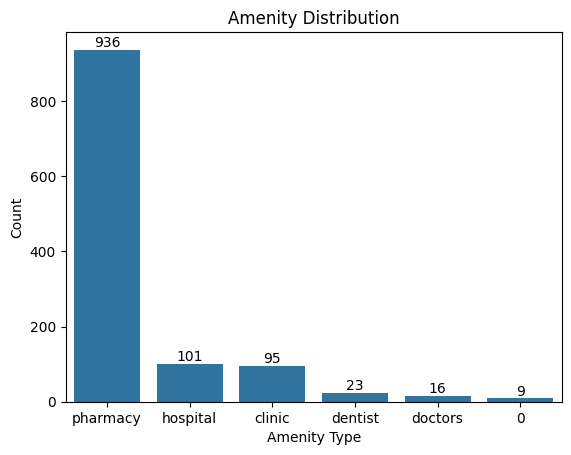

In [ ]:
# plotting Amenity distributions

ax = sns.barplot(x=df['Amenity'].value_counts().index, y=df['Amenity'].value_counts())

# adding value annotations on each bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Text is the height of the bar
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position: center of the bar
                ha='center', va='bottom', fontsize=10)  # Alignment and font size

plt.title('Amenity Distribution')
plt.xlabel('Amenity Type')
plt.ylabel('Count')
plt.show()

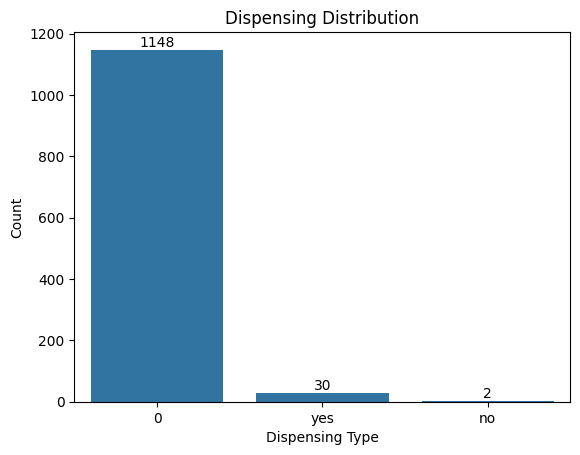

In [ ]:
# dispensing distribution

ax = sns.barplot(x=df['Dispensing'].value_counts().index, y=df['Dispensing'].value_counts())

# adding value annotations on each bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Text is the height of the bar
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position: center of the bar
                ha='center', va='bottom', fontsize=10)  # Alignment and font size

plt.title('Dispensing Distribution')
plt.xlabel('Dispensing Type')
plt.ylabel('Count')
plt.show()



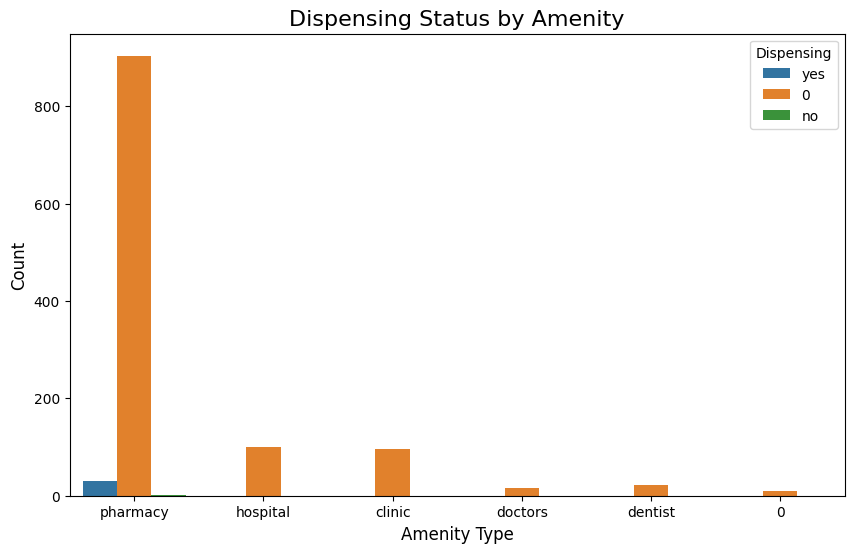

In [ ]:
# create a count plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Amenity', hue='Dispensing')

# add plot labels and title
plt.title('Dispensing Status by Amenity', fontsize=16)
plt.xlabel('Amenity Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Dispensing', loc='upper right')

plt.show()

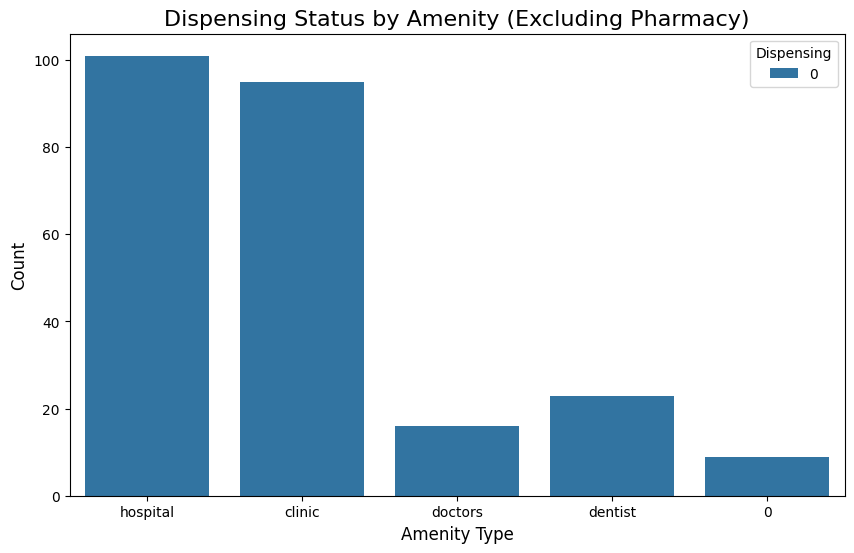

In [ ]:
# Filter the data to exclude rows where Amenity is 'pharmacy'
df_filtered = df[df['Amenity'] != 'pharmacy']

# Create a count plot to visualize the dispensing status for each amenity (excluding pharmacy)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Amenity', hue='Dispensing')

# Add plot labels and title
plt.title('Dispensing Status by Amenity (Excluding Pharmacy)', fontsize=16)
plt.xlabel('Amenity Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Dispensing', loc='upper right')

# Show the plot
plt.show()

In [ ]:
(df['Amenity'] == 'hospital').sum()

101

In [ ]:
((df['Amenity'] == 'hospital') & (df['Dispensing'] == 'yes')).sum()

0

In [ ]:
# Implement graphical representation of health facilities
import folium

# Create map
map_center = [15.5974, 32.5356]  # Adjust to center on your area
m = folium.Map(location=map_center, zoom_start=14)

# Add facilities to the map
for _, row in df.iterrows():
    if row['X'] != 0 and row['Y'] != 0:  # Ignore invalid coordinates
        color = 'green' if row['Dispensing'] == 'yes' else 'red'
        folium.Marker([row['Y'], row['X']], popup=row['Name'], icon=folium.Icon(color=color)).add_to(m)

# Show map
m.save("health_facilities_map.html")

m